### Dataset from kaggle:
>###### https://www.kaggle.com/datasets/atifmasih/kids-nightmare-patterns-and-psychological-impact/data

### Features:
>##### Age: Age of the child (in years).
>##### Gender: Gender of the child (Male/Female).
>##### Nightmare Frequency: How often the child experiences nightmares (e.g., Weekly, Bi-weekly, Monthly).
>##### Nightmare Content: The primary theme or fear represented in the nightmare (e.g., Being Chased, Water Drowning, Monster in Room).
>##### Sleep Patterns: Consistency of the child's sleep routine (e.g., Consistent sleep, Irregular sleep).
>##### Recent Life Changes: Any recent significant changes in the child’s life (e.g., Academic pressure, New sibling born, Parent's job loss).
>##### Sleep Environment: Elements of the child’s sleep environment that may influence nightmares (e.g., Curtains blowing, Creaking floor, Shared room).
>##### Parental Observations: Observations by parents regarding the child's behavior or experiences related to nightmares (e.g., Alone and Lost, Parental Slap Fear, Monster Under Bed).
>##### Psychological Problems at School: A 7-item scale measuring the severity of psychological issues at school, ranging from 7 to 35.
>##### Has Recent Life Changes: A binary indicator (1/0) denoting whether the child has experienced any recent life changes.
>##### Irregular Sleep Pattern: A binary indicator (1/0) denoting whether the child has irregular sleep patterns.
>##### Fear-Related Nightmare: A binary indicator (1/0) denoting whether the nightmare content is related to a fear-inducing theme.

# Part 1.) Data Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('nightmare_dataset.csv')

In [2]:
df.head(1)

,Age,Gender,Nightmare Frequency,Nightmare Content,Sleep Patterns,Recent Life Changes,Sleep Environment,Parental Observations,Psychological Problems at School,Has Recent Life Changes,Irregular Sleep Pattern,Fear-Related Nightmare
0,4.0,Female,Weekly,Being Chased,Consistent sleep,No recent changes,Curtains blowing,Alone and Lost,28.0,0,0,1


In [3]:
# Display the columns and their unique values to get a better understanding of our dataset.
def display_cols(df=None):
    information=dict()
    for column in df.columns:
        information[column] = df[column].unique()
    for col in information.keys():
        print(col, "==============================================\n", information[col])
        print("----------------------------")
        print("==============================================")
        print()
#display_cols(df)

In [4]:
print("Counts of NaN data:\n", df.isnull().sum())

Counts of NaN data:
 Age                                 1904
Gender                              2000
Nightmare Frequency                 2000
Nightmare Content                      0
Sleep Patterns                      2000
Recent Life Changes                 2000
Sleep Environment                   2000
Parental Observations               2000
Psychological Problems at School    2000
Has Recent Life Changes                0
Irregular Sleep Pattern                0
Fear-Related Nightmare                 0
dtype: int64


In [5]:
# Making a simple histo of Nightmare Freq vs Sleep Patterns, but first, we need to use one-hot encoding.

In [6]:
def label_encoding(data=None):
    # We do not label encode columns that are already numerical.
    data = data.copy()
    col_list=list()
    for col in data.columns:
        if data[col].dtype != 'float64':
            col_list.append(col)
            
    # We create a map to hold the index, and unique case values (Where the label encoding takes place).
    loc_map = {} 
    for col in col_list:
        for idx, case in enumerate(data[col].unique()):
            loc_map[case] = idx
        data[col] = data[col].map(loc_map)
    return data

df1 = label_encoding(data=df)
print("Converted cat columns to numerical")
df1

Converted cat columns to numerical


,Age,Gender,Nightmare Frequency,Nightmare Content,Sleep Patterns,Recent Life Changes,Sleep Environment,Parental Observations,Psychological Problems at School,Has Recent Life Changes,Irregular Sleep Pattern,Fear-Related Nightmare
0,4.0,0,0,0,0,0,0,0,28.0,0,0,0
1,10.0,1,1,1,0,1,1,1,12.0,1,0,0
2,NaN,0,0,2,1,2,2,2,29.0,1,1,1
3,NaN,1,0,3,1,3,3,3,17.0,1,1,0
4,10.0,1,1,4,1,1,4,4,21.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,NaN,0,0,20,0,0,1,14,NaN,0,0,0
19996,4.0,1,3,16,1,0,8,9,27.0,0,1,1
19997,NaN,1,2,1,0,8,9,6,11.0,1,0,0
19998,6.0,0,0,0,0,1,1,12,NaN,1,0,0


In [7]:
# Next, we will do mean imputation for the colums that are numerical and NaN.
def mean_impute(data=None):
    data = data.copy()
    # appending the mean values to a dictionary for reference
    column_mean_dict=dict()
    for col in data.columns:
        # Take the mean of the column.
        x_bar = np.mean(data[col]).round() # used numpy to find the mean of 'x' column, then we round up.
        column_mean_dict[col] = x_bar
        data[col] = data[col].fillna(x_bar)
        
    return data, column_mean_dict
df2, column_mean_dict = mean_impute(data=df1)
df2   

,Age,Gender,Nightmare Frequency,Nightmare Content,Sleep Patterns,Recent Life Changes,Sleep Environment,Parental Observations,Psychological Problems at School,Has Recent Life Changes,Irregular Sleep Pattern,Fear-Related Nightmare
0,4.0,0,0,0,0,0,0,0,28.0,0,0,0
1,10.0,1,1,1,0,1,1,1,12.0,1,0,0
2,8.0,0,0,2,1,2,2,2,29.0,1,1,1
3,8.0,1,0,3,1,3,3,3,17.0,1,1,0
4,10.0,1,1,4,1,1,4,4,21.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,8.0,0,0,20,0,0,1,14,21.0,0,0,0
19996,4.0,1,3,16,1,0,8,9,27.0,0,1,1
19997,8.0,1,2,1,0,8,9,6,11.0,1,0,0
19998,6.0,0,0,0,0,1,1,12,21.0,1,0,0


In [8]:
#column_mean_dict

In [9]:
print("Counts of NaN data:\n", df2.isnull().sum())

Counts of NaN data:
 Age                                 0
Gender                              0
Nightmare Frequency                 0
Nightmare Content                   0
Sleep Patterns                      0
Recent Life Changes                 0
Sleep Environment                   0
Parental Observations               0
Psychological Problems at School    0
Has Recent Life Changes             0
Irregular Sleep Pattern             0
Fear-Related Nightmare              0
dtype: int64


# Part 2.) Quick Data Visualization

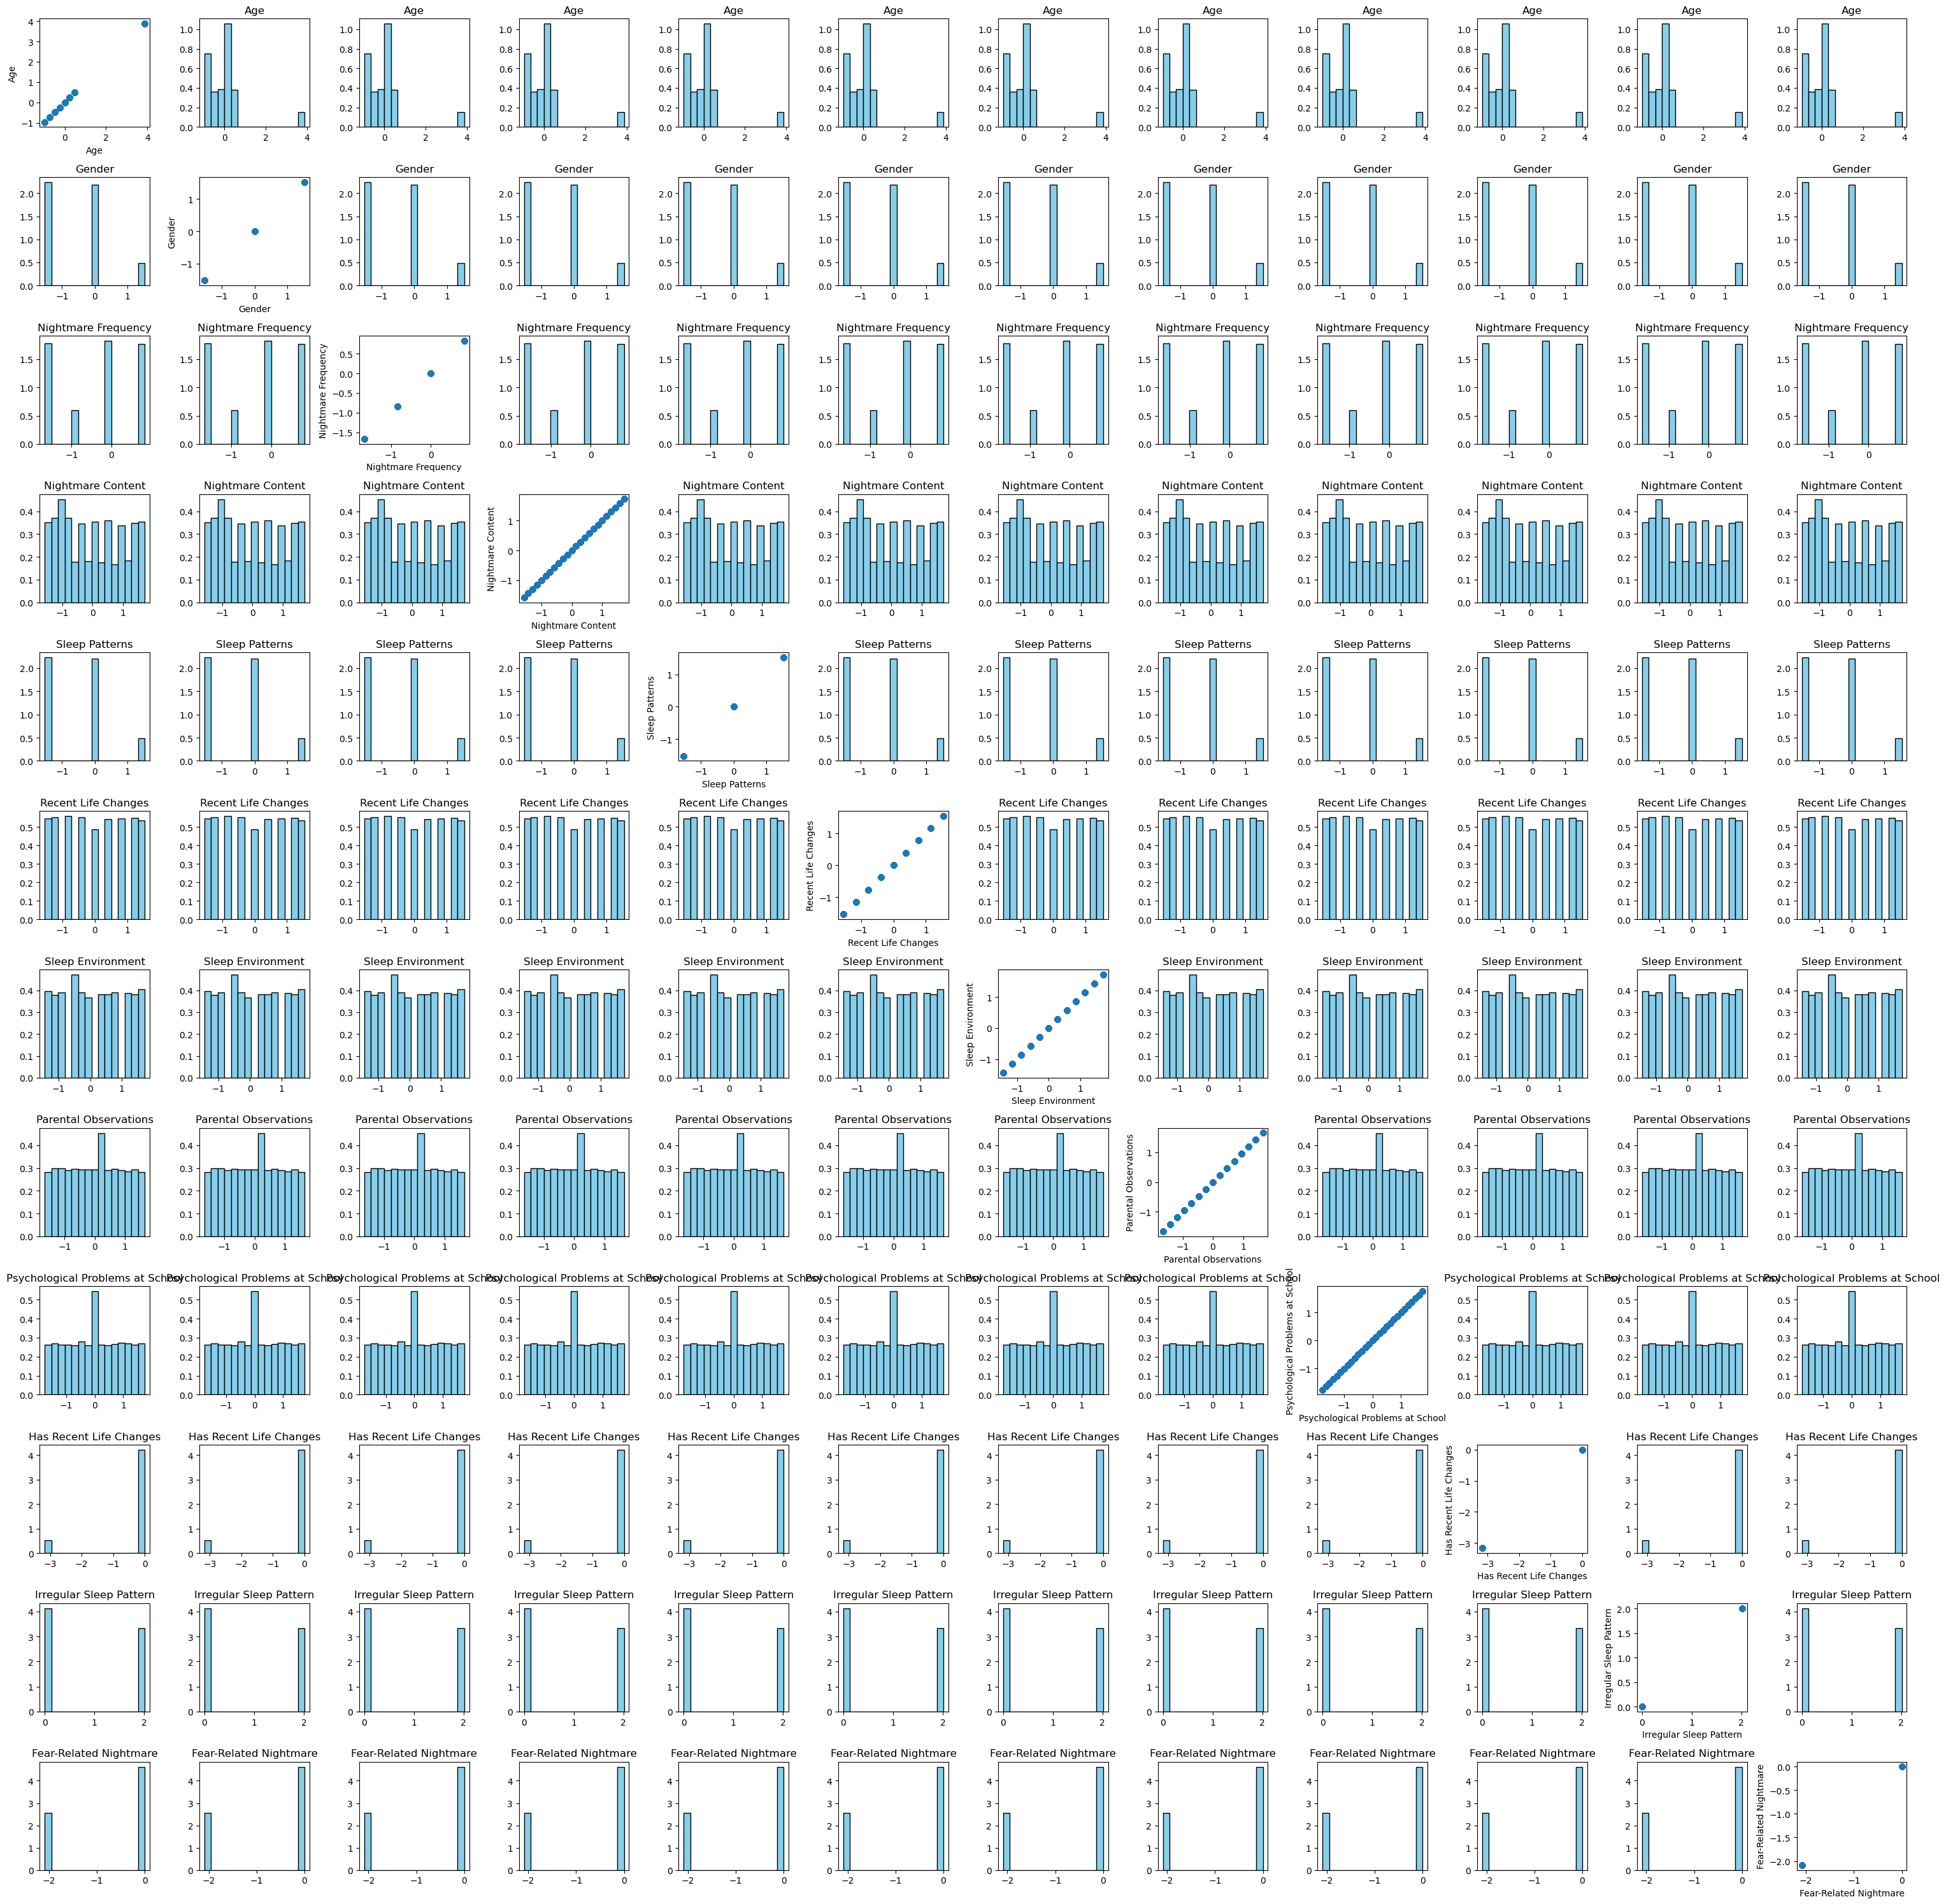

In [11]:
# First, we look at some columns that might have interesting comparisons of, in a pair plot.
# In the case of this data, we want to see the Psychological problems.
mask_dict={
          "Group_1": data['Number of Fatalities, 2012'] >= 100,
          "Group_2": data['Number of Fatalities, 2012'] < 100
      }


# Histogram plot function =======================================================
# note, I named x, target_col because putting it in a word was helpful for me.
# also, mask_dict is the filter/group we applied to the column we wanted to test.
def histo(data=None, target_col=None, mask_dict=None, **kwargs):
    for label, mask in mask_dict.items():
        _=plt.hist(data[mask][target_col], label=label, **kwargs)
        _=plt.xlabel(f"Distribution for {target_col}")
        _=plt.legend()

# Scatter plot function =======================================================
# note, I renamed x,y to explan_var and predict_var because using statistical terms made this function easier to write.
def scatter(data=None, explan_var=None, pred_list=None, mask_dict=None, **kwargs):
    for label, mask in mask_dict.items():
        for predict_var in pred_list:
            _=plt.scatter(data[mask][explan_var], data[mask][predict_var], label=label, **kwargs)
            _=plt.xlabel(f"Distribution for {explan_var} vs {predict_var}")
            _=plt.legend()
            
def pair_plot(data=None):
    col_list = [col for col in data.columns]
    # The pair plot is done in a for loop.
    plot_i = 0
    n = len(col_list)
    plt.figure(figsize=(15,15))
    for i, x_column_name in enumerate(col_list):
        for j, y_column_name in enumerate(col_list):
            plot_i +=1
            # change the subplt and legend
            plt.subplot(n,n,plot_i)
            if i == j:
                histo(data=data_1, target_col=x_column_name, mask_dict=mask_dict,
                    bins=5, alpha=0.5, density=1, stacked=True)
            else:
                scatter(data=data_1, explan_var=x_column_name,
                        pred_list=[y_column_name],
                        mask_dict=mask_dict)

pair_plot(df3)

In [12]:
### We need to normalize before we can do the analysis portion, so her is a function that transforms all the data points into a z-score.
def standardize(data, column_mean_dict):
    data = data.copy()
    for col in data.columns:
        z_score = (data[col] - column_mean_dict[col]) / data[col].std(ddof=0)
        data[col] = z_score
    return data
df3 = standardize(df2, column_mean_dict)
#df3